## Problem 3 [MCMC for Optimization]
The n-dimensional Scwefel function
$$
f(\vec x) = 418.9829n- \sum _{i=1} ^n x_i sin(\sqrt{|x_i|})\\
x_i\ in \ [-500,500]
$$
is a very bumpy surface with many local critical points and one global maximum. We will explore the surface for the case $n=2$ dimensions.  
i) Plot a contour plot of the surface for the 2-D surface.  
ii) Implement a simulated annealing procedure to find the global minimum of this surface.  
iii) Explore the behavior of the procedure starting from the origin with an exponential, a polynomial, and
a logarithmic cooling schedule. Run the procedure for $t={20, 50, 100, 1000}$ iterations for $k=100$ runs
each. Plot a histogram of the function minima your procedure converges to.  
iv) Choose your best run and overlay your 2-D sample path on the contour plot of the Schwefel function
to visualize the locations your optimization routine explored.

**i) Plot a contour plot of the surface for the 2-D surface.**

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


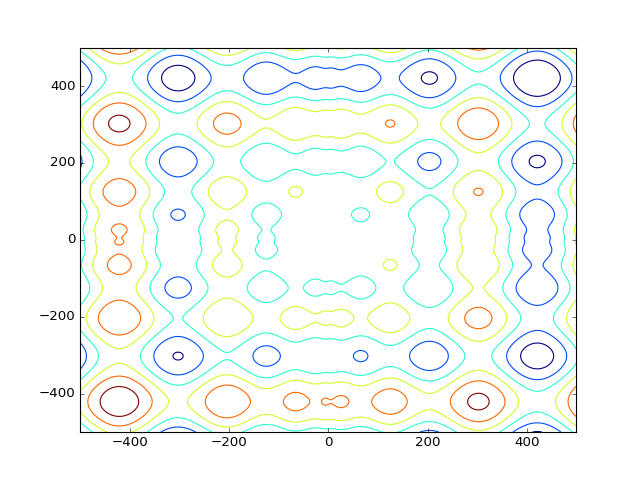

In [2]:
n = 2
x1 = np.arange(-500,500,1)
x2 = np.arange(-500,500,1)
X1,X2 = np.meshgrid(x1,x2)
Z = 418.9829*n - X1*np.sin(np.sqrt(abs(X1)))- X2*np.sin(np.sqrt(abs(X2)))
plt.figure()
CS = plt.contour(X1,X2,Z)
plt.show()

Next, we show the surface of the function.

<IPython.core.display.Javascript object>


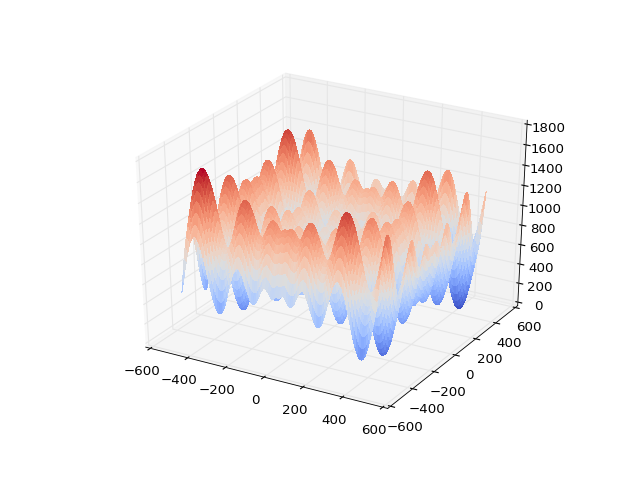

In [3]:
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X1,X2,Z,cmap=cm.coolwarm,linewidth=0,antialiased=False)
plt.show()

**ii) Implement a simulated annealing procedure to find the global minimum of this surface.**

In [4]:
def my_func(x):
    # Define the function that we are trying to optimize. 
    if sum(abs(x)>=500) > 0:
        return float('Inf')
    n = np.size(x)
    if n <= 1:
        return 418.9829 + x*np.sin(np.sqrt(abs(x)))
    return 418.9829*n + sum(map(lambda t: t*np.sin(np.sqrt(abs(t))),x))

Start the iteration.

In [5]:
MAXSIMTIME = 100
sim_result_list = []
sim_value_list = []
for j in range(MAXSIMTIME):
    MAXITERATION = 1000
    tau = 1
    T0 = 700
    x_1 = np.array([1000*(np.random.rand()-0.5),1000*(np.random.rand()-0.5)])
    for i in range(MAXITERATION):
        T = T0 * (i+1)**(-tau)
        x_2 = x_1 + np.random.normal(0,100,2)
        alpha = np.exp((my_func(x_1)-my_func(x_2))/(T))
        alpha = min(1,alpha)
        if np.random.rand()<alpha:
            x_1 = x_2
    sim_result_list.append(x_1)
    sim_value_list.append(my_func(x_1))

In [6]:
xmin = np.argmin(sim_value_list)
print 'The found minimum point is',sim_result_list[xmin]
print 'The found minimum value is',sim_value_list[xmin]

The found minimum point is [-420.12376204 -420.70997562]
The found minimum value is 0.0985364463766


**iii) Explore the behavior of the procedure starting from the origin with an exponential, a polynomial, and a logarithmic cooling schedule. Run the procedure for  t=20,50,100,1000
  iterations for  k=100
  runs each. Plot a histogram of the function minima your procedure converges to.
  **

- polynomial cooling schedule

In [7]:
MAXSIMTIME = 100
sim_result_list = []
sim_value_list = []
for j in range(MAXSIMTIME):
    MAXITERATION = 20
    tau = 1
    T0 = 700
    x_1 = np.array([1000*(np.random.rand()-0.5),1000*(np.random.rand()-0.5)])
    for i in range(MAXITERATION):
        # Implement the polynomial cooling schedule.
        T = T0 * (i+1)**(-tau)
        x_2 = x_1 + np.random.normal(0,100,2)
        alpha = np.exp((my_func(x_1)-my_func(x_2))/(T))
        alpha = min(1,alpha)
        if np.random.rand()<alpha:
            x_1 = x_2
    sim_result_list.append(x_1)
    sim_value_list.append(my_func(x_1))
poly_minima_list_20 = sim_value_list

In [8]:
MAXSIMTIME = 100
sim_result_list = []
sim_value_list = []
for j in range(MAXSIMTIME):
    MAXITERATION = 50
    tau = 1
    T0 = 700
    x_1 = np.array([1000*(np.random.rand()-0.5),1000*(np.random.rand()-0.5)])
    for i in range(MAXITERATION):
        # Implement the polynomial cooling schedule.
        T = T0 * (i+1)**(-tau)
        x_2 = x_1 + np.random.normal(0,100,2)
        alpha = np.exp((my_func(x_1)-my_func(x_2))/(T))
        alpha = min(1,alpha)
        if np.random.rand()<alpha:
            x_1 = x_2
    sim_result_list.append(x_1)
    sim_value_list.append(my_func(x_1))
poly_minima_list_50 = sim_value_list

In [9]:
MAXSIMTIME = 100
sim_result_list = []
sim_value_list = []
for j in range(MAXSIMTIME):
    MAXITERATION = 100
    tau = 1
    T0 = 700
    x_1 = np.array([1000*(np.random.rand()-0.5),1000*(np.random.rand()-0.5)])
    for i in range(MAXITERATION):
        # Implement the polynomial cooling schedule.
        T = T0 * (i+1)**(-tau)
        x_2 = x_1 + np.random.normal(0,100,2)
        alpha = np.exp((my_func(x_1)-my_func(x_2))/(T))
        alpha = min(1,alpha)
        if np.random.rand()<alpha:
            x_1 = x_2
    sim_result_list.append(x_1)
    sim_value_list.append(my_func(x_1))
poly_minima_list_100 = sim_value_list

In [10]:
MAXSIMTIME = 100
sim_result_list = []
sim_value_list = []
for j in range(MAXSIMTIME):
    MAXITERATION = 1000
    tau = 1
    T0 = 700
    x_1 = np.array([1000*(np.random.rand()-0.5),1000*(np.random.rand()-0.5)])
    for i in range(MAXITERATION):
        # Implement the polynomial cooling schedule.
        T = T0 * (i+1)**(-tau)
        x_2 = x_1 + np.random.normal(0,100,2)
        alpha = np.exp((my_func(x_1)-my_func(x_2))/(T))
        alpha = min(1,alpha)
        if np.random.rand()<alpha:
            x_1 = x_2
    sim_result_list.append(x_1)
    sim_value_list.append(my_func(x_1))
poly_minima_list_1000 = sim_value_list

<IPython.core.display.Javascript object>


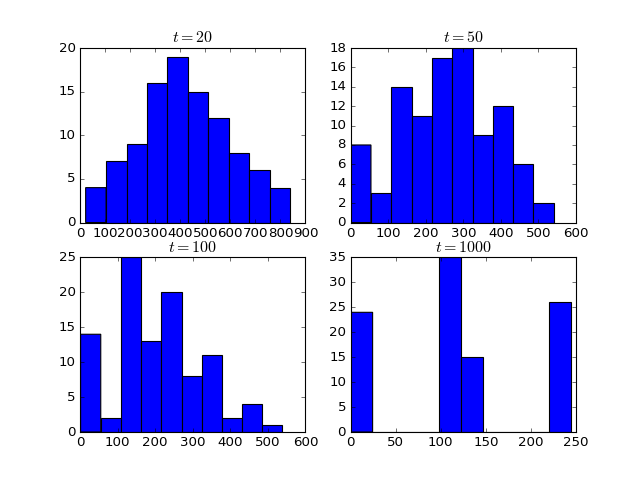

In [11]:
plt.figure()
plt.subplot(2,2,1)
plt.hist(poly_minima_list_20)
plt.title('$t=20$')
plt.subplot(2,2,2)
plt.hist(poly_minima_list_50)
plt.title('$t=50$')
plt.subplot(2,2,3)
plt.hist(poly_minima_list_100)
plt.title('$t=100$')
plt.subplot(2,2,4)
plt.hist(poly_minima_list_1000)
plt.title('$t=1000$')
plt.show()

- exponential cooling schedule

In [12]:
MAXSIMTIME = 100
sim_result_list = []
sim_value_list = []
for j in range(MAXSIMTIME):
    MAXITERATION = 20
    T0 = 700
    lamb = 0.2
    x_1 = np.array([1000*(np.random.rand()-0.5),1000*(np.random.rand()-0.5)])
    for i in range(MAXITERATION):
        # Implement the exponential cooling schedule.
        T = T0 * np.exp(-lamb*i)
        x_2 = x_1 + np.random.normal(0,100,2)
        alpha = np.exp((my_func(x_1)-my_func(x_2))/(T))
        alpha = min(1,alpha)
        if np.random.rand()<alpha:
            x_1 = x_2
    sim_result_list.append(x_1)
    sim_value_list.append(my_func(x_1))
exp_minima_list_20 = sim_value_list

In [13]:
MAXSIMTIME = 100
sim_result_list = []
sim_value_list = []
for j in range(MAXSIMTIME):
    MAXITERATION = 50
    T0 = 700
    lamb = 0.2
    x_1 = np.array([1000*(np.random.rand()-0.5),1000*(np.random.rand()-0.5)])
    for i in range(MAXITERATION):
        # Implement the exponential cooling schedule.
        T = T0 * np.exp(-lamb*i)
        x_2 = x_1 + np.random.normal(0,100,2)
        alpha = np.exp((my_func(x_1)-my_func(x_2))/(T))
        alpha = min(1,alpha)
        if np.random.rand()<alpha:
            x_1 = x_2
    sim_result_list.append(x_1)
    sim_value_list.append(my_func(x_1))
exp_minima_list_50= sim_value_list

/Users/zhangliang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: overflow encountered in exp


In [14]:
MAXSIMTIME = 100
sim_result_list = []
sim_value_list = []
for j in range(MAXSIMTIME):
    MAXITERATION = 100
    T0 = 700
    lamb = 0.2
    x_1 = np.array([1000*(np.random.rand()-0.5),1000*(np.random.rand()-0.5)])
    for i in range(MAXITERATION):
        # Implement the exponential cooling schedule.
        T = T0 * np.exp(-lamb*i)
        x_2 = x_1 + np.random.normal(0,100,2)
        alpha = np.exp((my_func(x_1)-my_func(x_2))/(T))
        alpha = min(1,alpha)
        if np.random.rand()<alpha:
            x_1 = x_2
    sim_result_list.append(x_1)
    sim_value_list.append(my_func(x_1))
exp_minima_list_100= sim_value_list

/Users/zhangliang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: overflow encountered in exp


In [15]:
MAXSIMTIME = 100
sim_result_list = []
sim_value_list = []
for j in range(MAXSIMTIME):
    MAXITERATION = 1000
    T0 = 700
    lamb = 0.2
    x_1 = np.array([1000*(np.random.rand()-0.5),1000*(np.random.rand()-0.5)])
    for i in range(MAXITERATION):
        # Implement the exponential cooling schedule.
        T = T0 * np.exp(-lamb*i)
        x_2 = x_1 + np.random.normal(0,100,2)
        alpha = np.exp((my_func(x_1)-my_func(x_2))/(T))
        alpha = min(1,alpha)
        if np.random.rand()<alpha:
            x_1 = x_2
    sim_result_list.append(x_1)
    sim_value_list.append(my_func(x_1))
exp_minima_list_1000= sim_value_list

/Users/zhangliang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: overflow encountered in exp


<IPython.core.display.Javascript object>


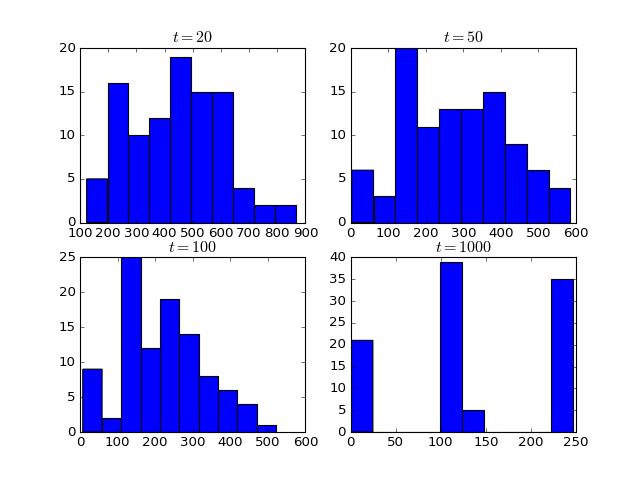

In [16]:
plt.figure()
plt.subplot(2,2,1)
plt.hist(exp_minima_list_20)
plt.title('$t=20$')
plt.subplot(2,2,2)
plt.hist(exp_minima_list_50)
plt.title('$t=50$')
plt.subplot(2,2,3)
plt.hist(exp_minima_list_100)
plt.title('$t=100$')
plt.subplot(2,2,4)
plt.hist(exp_minima_list_1000)
plt.title('$t=1000$')
plt.show()

- logarithmic cooling schedule

In [17]:
MAXSIMTIME = 100
sim_result_list = []
sim_value_list = []
for j in range(MAXSIMTIME):
    MAXITERATION = 20
    T0 = 700*np.log(2)
    lamb = 1000
    x_1 = np.array([1000*(np.random.rand()-0.5),1000*(np.random.rand()-0.5)])
    for i in range(MAXITERATION):
        # Implement the logarithmic cooling schedule.
        T = T0 / np.log(lamb+i)
        x_2 = x_1 + np.random.normal(0,100,2)
        alpha = np.exp((my_func(x_1)-my_func(x_2))/(T))
        alpha = min(1,alpha)
        if np.random.rand()<alpha:
            x_1 = x_2
    sim_result_list.append(x_1)
    sim_value_list.append(my_func(x_1))
log_minima_list_20= sim_value_list

In [18]:
MAXSIMTIME = 100
sim_result_list = []
sim_value_list = []
for j in range(MAXSIMTIME):
    MAXITERATION = 50
    T0 = 700*np.log(2)
    lamb = 1000
    x_1 = np.array([1000*(np.random.rand()-0.5),1000*(np.random.rand()-0.5)])
    for i in range(MAXITERATION):
        # Implement the logarithmic cooling schedule.
        T = T0 / np.log(lamb+i)
        x_2 = x_1 + np.random.normal(0,100,2)
        alpha = np.exp((my_func(x_1)-my_func(x_2))/(T))
        alpha = min(1,alpha)
        if np.random.rand()<alpha:
            x_1 = x_2
    sim_result_list.append(x_1)
    sim_value_list.append(my_func(x_1))
log_minima_list_50= sim_value_list

In [19]:
MAXSIMTIME = 100
sim_result_list = []
sim_value_list = []
for j in range(MAXSIMTIME):
    MAXITERATION = 100
    T0 = 700*np.log(2)
    lamb = 1000
    x_1 = np.array([1000*(np.random.rand()-0.5),1000*(np.random.rand()-0.5)])
    for i in range(MAXITERATION):
        # Implement the logarithmic cooling schedule.
        T = T0 / np.log(lamb+i)
        x_2 = x_1 + np.random.normal(0,100,2)
        alpha = np.exp((my_func(x_1)-my_func(x_2))/(T))
        alpha = min(1,alpha)
        if np.random.rand()<alpha:
            x_1 = x_2
    sim_result_list.append(x_1)
    sim_value_list.append(my_func(x_1))
log_minima_list_100= sim_value_list

In [20]:
MAXSIMTIME = 100
sim_result_list = []
sim_value_list = []
for j in range(MAXSIMTIME):
    MAXITERATION = 1000
    T0 = 700*np.log(2)
    lamb = 1000
    x_1 = np.array([1000*(np.random.rand()-0.5),1000*(np.random.rand()-0.5)])
    for i in range(MAXITERATION):
        # Implement the logarithmic cooling schedule.
        T = T0 / np.log(lamb+i)
        x_2 = x_1 + np.random.normal(0,100,2)
        alpha = np.exp((my_func(x_1)-my_func(x_2))/(T))
        alpha = min(1,alpha)
        if np.random.rand()<alpha:
            x_1 = x_2
    sim_result_list.append(x_1)
    sim_value_list.append(my_func(x_1))
log_minima_list_1000= sim_value_list

<IPython.core.display.Javascript object>


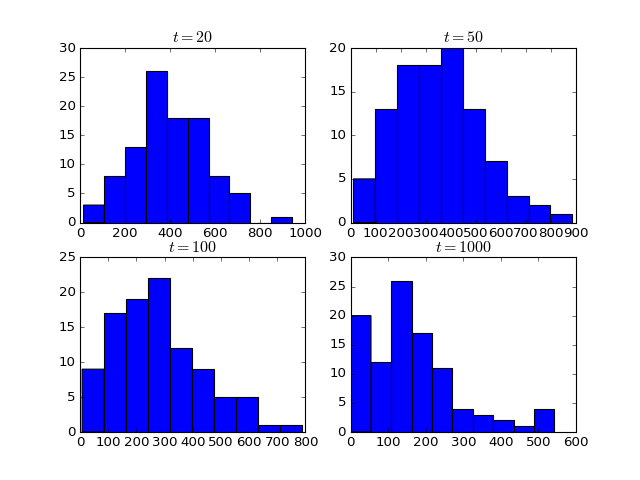

In [21]:
plt.figure()
plt.subplot(2,2,1)
plt.hist(log_minima_list_20)
plt.title('$t=20$')
plt.subplot(2,2,2)
plt.hist(log_minima_list_50)
plt.title('$t=50$')
plt.subplot(2,2,3)
plt.hist(log_minima_list_100)
plt.title('$t=100$')
plt.subplot(2,2,4)
plt.hist(log_minima_list_1000)
plt.title('$t=1000$')
plt.show()

**iv) Choose your best run and overlay your 2-D sample path on the contour plot of the Schwefel function to visualize the locations your optimization routine explored.**

In [22]:
MAXSIMTIME = 100
sim_result_list = []
sim_value_list = []
x_record_list = []
for j in range(MAXSIMTIME):
    MAXITERATION = 1000
    T0 = 700
    lamb = 0.2
    x_1 = np.array([1000*(np.random.rand()-0.5),1000*(np.random.rand()-0.5)])
    x_record = []
    x_record.append(x_1)
    for i in range(MAXITERATION):
        T = T0 * np.exp(-lamb*i)
        x_2 = x_1 + np.random.normal(0,300,2)
        alpha = np.exp((my_func(x_1)-my_func(x_2))/(T))
        alpha = min(1,alpha)
        if np.random.rand()<alpha:
            x_1 = x_2
            x_record.append(x_1)
    sim_result_list.append(x_1)
    sim_value_list.append(my_func(x_1))
    x_record_list.append(x_record)
exp_minima_list_1000= sim_value_list

/Users/zhangliang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: overflow encountered in exp


<IPython.core.display.Javascript object>


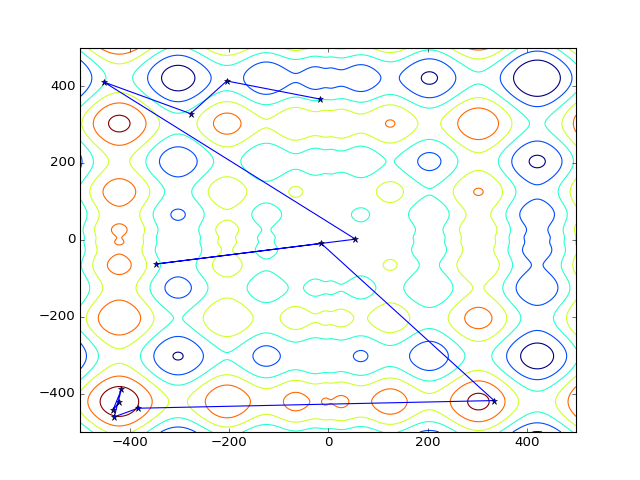

In [23]:
min_index = np.argmin(sim_value_list)
plt.figure()
CS = plt.contour(X1,X2,Z)
x_point = np.array(x_record_list[min_index]).T
plt.hold(True)
plt.plot(x_point[0],x_point[1],'*-')
plt.show()